<a href="https://colab.research.google.com/github/MazenMarei25/Machine-Learning-Practice-/blob/main/Classification/Machine_Failure_XGBoost_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("umerrtx/machine-failure-prediction-using-sensor-data")

print("Path to dataset files:", path)

100%|██████████| 6.79k/6.79k [00:00<00:00, 11.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/umerrtx/machine-failure-prediction-using-sensor-data/versions/1


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv("/root/.cache/kagglehub/datasets/umerrtx/machine-failure-prediction-using-sensor-data/versions/1/data.csv")

x = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,      # 20% for testing, 80% for training
    random_state=42
)


In [ ]:
print(x_train)
print(y_train)

print(x_test)
print(y_test)

[[ 22   3   7 ...  28   4  14]
 [  0   6   4 ...  91   1   5]
 [  0   6   5 ...  64   2  15]
 ...
 [ 23   5   6 ...  49   6  23]
 [110   7   4 ...  76   4  17]
 [ 84   7   4 ...  67   2   7]]
[[1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0

In [ ]:
print(x_train[0])

[22  3  7  1  6  5 28  4 14]


In [ ]:
# standarize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,:] = sc.fit_transform(x_train[:,:])
x_test[:,:] = sc.transform(x_test[:,:])


In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred,labels=classifier.classes_)
ac = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Confusion Matrix:    {cm}")
print(f"Accuracy: {ac}")
print("")
print("Classification report")
print("--------------------")
print( report)

Confusion Matrix:    [[88 14]
 [21 66]]
Accuracy: 0.8148148148148148

Classification report
--------------------
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       102
           1       0.82      0.76      0.79        87

    accuracy                           0.81       189
   macro avg       0.82      0.81      0.81       189
weighted avg       0.82      0.81      0.81       189



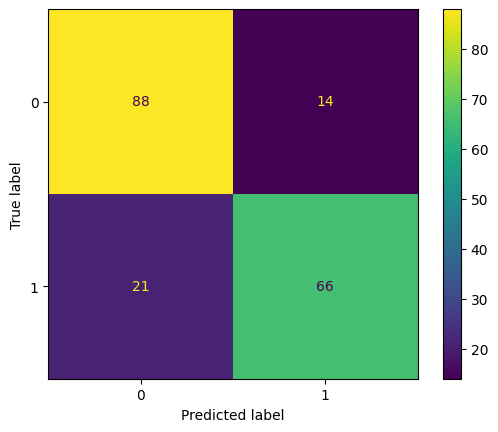

In [ ]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()
plt.show()